# Group 27 DSCI 100: Project Proposal

### 1. Introduction:
(Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question)


Life expectancy is a statistic that varies throughout countries based on many factors. A common question in healthcare is continued to be asked: what can be done to improve life expectancy? As countries continue to improve on this aspect, the statistics are crucial to prove statements and observe trends. It is often dicussed how much effort should go into health expenditure which defines the amount spent on health care and services such as research, insurance, and more. 
Through this project the analysis of the relationship between life expectancy and health expenditure will be observed. 
"How much can we improve life expectancy by increasing health expenditure?"
The dataset used will list the data collected on life expectancy, health expenditure, bmi, mortality rates, and more... all sorted by country in an alphabetically ordered fashion. In this project, the columns of importance will be country, life expectancy, and health expenditure.



### 2. Tidy Data:
Our data was The Global Health Observatory (GHO) data repository under **World Health Organization (WHO)**: https://www.who.int/data/gho

- country 
- year

Mortality Variables
- life_expectancy
- adult_mortality
- infant_deaths
- under_five_deaths

Health Variables
- hepatitis_b
- measles
- polio
- diphtheria
- HIV_AIDS

We combine GDP and Population Data taken from the **World Bank**: https://databank.worldbank.org/home.aspx

- country
- year
- gdp (current USD)
- population (total)
- current health expenditure per capita (current USD)

We create new variables:

- Country classification (based on GDP per capita): Low-income (<4,000), Medium-income 
(4,000-13,000), High-income (13,000+)
- Health expenditure as a % of GDP (health expenditure / GDP)

In [2]:
### Setup packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

In [3]:
# wrangling world bank data to tidy format

world_bank_data <- read_csv("data/world_bank_data.csv")

population <- world_bank_data %>%
    filter(Series_Name == "Population, total") %>%
    gather(year, population, 3:18, factor_key=TRUE) %>%
    select(- Series_Name) %>%
    mutate(population = as.numeric(population))

gdp <- world_bank_data %>%
    filter(Series_Name == "GDP (current US$)") %>%
    gather(year, gdp, 3:18, factor_key=TRUE) %>%
    select(- Series_Name) %>%
    mutate(gdp = as.numeric(gdp))

health_exp <- world_bank_data %>%
    filter(Series_Name == "Current health expenditure per capita (current US$)") %>%
    gather(year, health_exp_per_capita, 3:18, factor_key=TRUE) %>%
    select(- Series_Name) %>%
    mutate(health_exp_per_capita = as.numeric(health_exp_per_capita))

world_bank_combined <- merge(population, gdp, by=c("Country_Name","year"))

world_bank_combined <- merge(world_bank_combined, health_exp, by=c("Country_Name","year")) %>%
    rename(c('country'='Country_Name'))


world_bank_combined


Parsed with column specification:
cols(
  Series_Name = col_character(),
  Country_Name = col_character(),
  `2000` = col_character(),
  `2001` = col_character(),
  `2002` = col_character(),
  `2003` = col_character(),
  `2004` = col_character(),
  `2005` = col_character(),
  `2006` = col_character(),
  `2007` = col_character(),
  `2008` = col_character(),
  `2009` = col_character(),
  `2010` = col_character(),
  `2011` = col_character(),
  `2012` = col_character(),
  `2013` = col_character(),
  `2014` = col_character(),
  `2015` = col_character()
)

Warning message:
“Problem with `mutate()` input `population`.
ℹ NAs introduced by coercion
ℹ Input `population` is `as.numeric(population)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `gdp`.
ℹ NAs introduced by coercion
ℹ Input `gdp` is `as.numeric(gdp)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“

country,year,population,gdp,health_exp_per_capita
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Afghanistan,2000,20779957,NA,NA
Afghanistan,2001,21606992,NA,NA
Afghanistan,2002,22600774,4055179566,15.80316
Afghanistan,2003,23680871,4515558808,17.03574
Afghanistan,2004,24726689,5226778809,20.41276
Afghanistan,2005,25654274,6209137625,23.89050
Afghanistan,2006,26433058,6971285595,27.83657
Afghanistan,2007,27100542,9747879532,31.27184
Afghanistan,2008,27722281,10109225814,38.10266


In [9]:
#import WHO data and combine with World Bank data

who_data <- read_csv("data/who_data.csv") %>%
    select(-bmi, -alcohol)

combined_data <- merge(who_data, world_bank_combined, by=c("country","year"))

Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(),
  life_expectancy = col_double(),
  adult_mortality = col_double(),
  infant_deaths = col_double(),
  alcohol = col_double(),
  hepatitis_b = col_double(),
  measles = col_double(),
  bmi = col_double(),
  under_five_deaths = col_double(),
  polio = col_double(),
  diphtheria = col_double(),
  HIV_AIDS = col_double()
)



In [10]:
# adding variables

combined_data_mutated <- combined_data %>% 
    mutate(gdp_per_capita = gdp / population) %>%
    mutate(health_exp_to_gdp = health_exp_per_capita / gdp_per_capita * 100) %>%
    mutate(gdp_classification = as.factor(ifelse(gdp_per_capita < 4000, "Low-Income",
                                      ifelse(gdp_per_capita < 13000,"Medium-Income", 
                                                         "High-Income"))))
combined_data_mutated


country,year,life_expectancy,adult_mortality,infant_deaths,hepatitis_b,measles,under_five_deaths,polio,diphtheria,HIV_AIDS,population,gdp,health_exp_per_capita,gdp_per_capita,health_exp_to_gdp,gdp_classification
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,2000,54.8,321,88,62,6532,122,24,24,0.1,20779957,NA,NA,NA,NA,NA
Afghanistan,2001,55.3,316,88,63,8762,122,35,33,0.1,21606992,NA,NA,NA,NA,NA
Afghanistan,2002,56.2,3,88,64,2486,122,36,36,0.1,22600774,4055179566,15.80316,179.4266,8.807593,Low-Income
Afghanistan,2003,56.7,295,87,65,798,122,41,41,0.1,23680871,4515558808,17.03574,190.6838,8.934027,Low-Income
Afghanistan,2004,57.0,293,87,67,466,120,5,5,0.1,24726689,5226778809,20.41276,211.3821,9.656809,Low-Income
Afghanistan,2005,57.3,291,85,66,1296,118,58,58,0.1,25654274,6209137625,23.89050,242.0313,9.870831,Low-Income
Afghanistan,2006,57.3,295,84,64,1990,116,58,58,0.1,26433058,6971285595,27.83657,263.7336,10.554806,Low-Income
Afghanistan,2007,57.5,295,82,63,1141,113,63,63,0.1,27100542,9747879532,31.27184,359.6932,8.694032,Low-Income
Afghanistan,2008,58.1,287,80,64,1599,110,64,64,0.1,27722281,10109225814,38.10266,364.6607,10.448799,Low-Income


### 3. Tables & Graphs:

**3.1. Tables:**

- Table 1: Summary Table of number of observations for each variable
- Table 2: Average health expenditure per capita for each gdp_classification
- Table 3: Average gdp per capita for each gdp_classification


In [6]:
# Table 1:



# Table 2
combined_data_mutated %>%
    group_by(gdp_classification) %>%
    summarize(average_gdp = mean(health_exp_per_capita, na.rm = TRUE)) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

# Table 3
combined_data_mutated %>%
    group_by(gdp_classification) %>%
    summarize(average_gdp = mean(gdp_per_capita, na.rm = TRUE)) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,average_gdp
<fct>,<dbl>
High-Income,2712.55280
Low-Income,81.47952
Medium-Income,420.38783


`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,average_gdp
<fct>,<dbl>
High-Income,34995.997
Low-Income,1445.308
Medium-Income,7206.130


**3.2. Graphs:**

- Summary Table of number of observations for each variable
- Average health expenditure per capita for each gdp_classification
- Average gdp per capita for each gdp_classification


**Graph 1**

We graph the average ratio of health expenditure per capita to GDP per capita of each low, medium, and high income countries (classified by GDP) across time.

`summarise()` regrouping output by 'gdp_classification' (override with `.groups` argument)

Warning message:
“Removed 16 row(s) containing missing values (geom_path).”


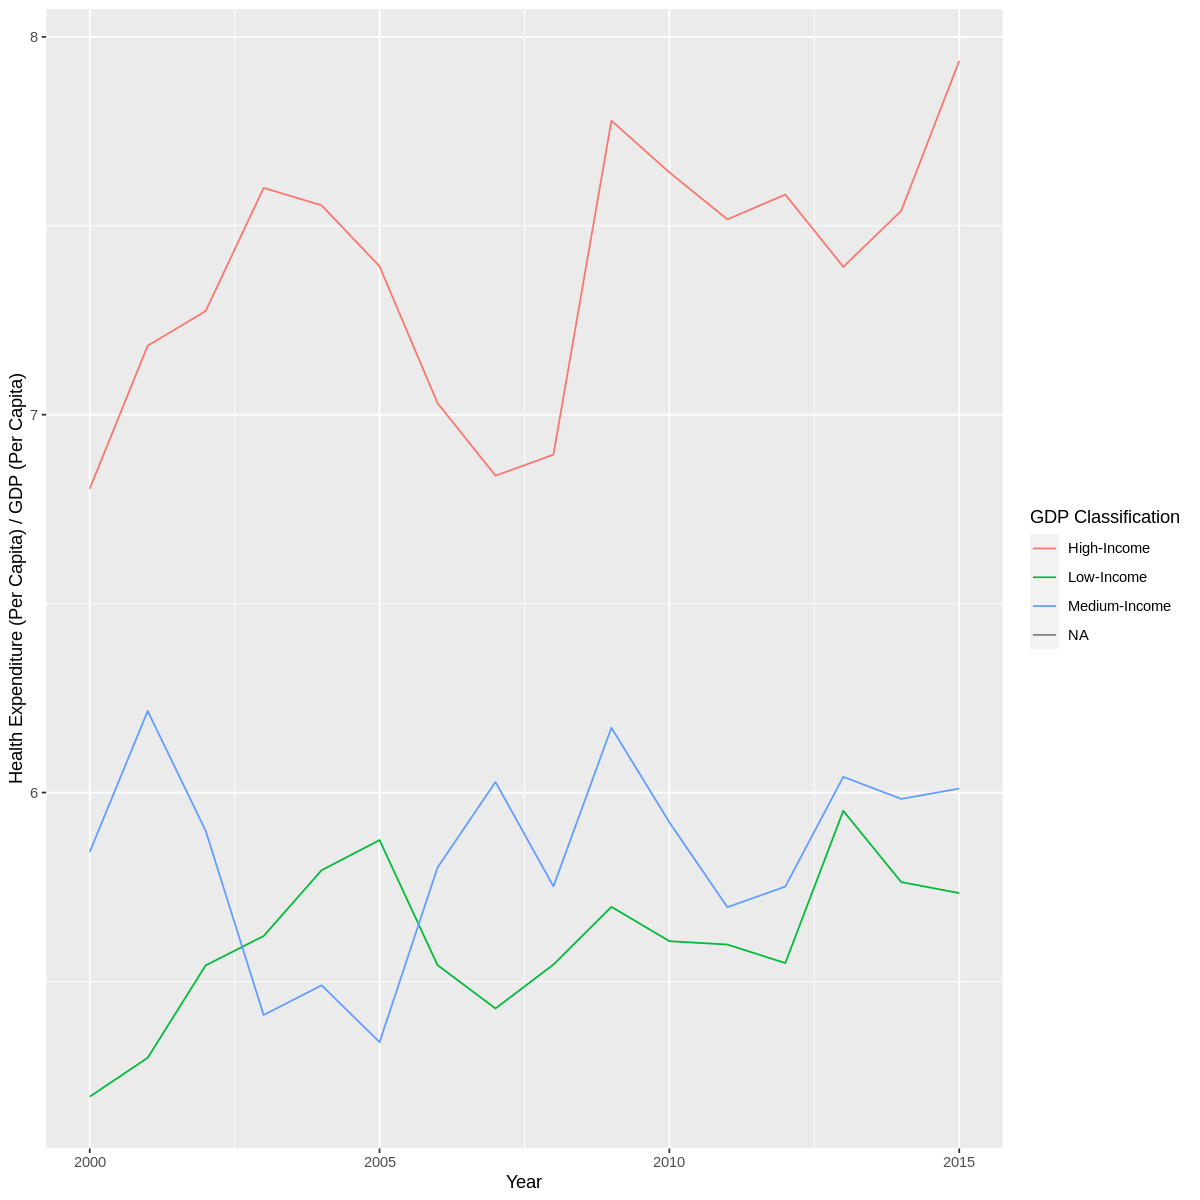

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

average_ratio <- combined_data_mutated %>%
    select(country, year, gdp_classification, health_exp_to_gdp) %>%
    group_by(gdp_classification, year) %>%
    summarize(average_ratio = mean(health_exp_to_gdp, na.rm = TRUE))

Proposal_Plot_1 <- average_ratio %>%
ggplot(aes(x = year, y = average_ratio, color = gdp_classification))+
geom_line()+
labs(x= "Year", y= "Health Expenditure (Per Capita) / GDP (Per Capita)", color = "GDP Classification") 

Proposal_Plot_1

In [ ]:
Proposal_Plot_1 <- life_expectancy_2013 %>%
ggplot(aes(x = gdp_per_capita, y = health_expenditure_per_capita, color = gdp_classification))+
geom_point()+
labs(x= "GDP (Per Capita)", y= "Health Expenditure (Per Capita)", color = "GDP Class") 

Proposal_Plot_1.2<-life_expectancy_2013%>%
ggplot(aes(x = health_expenditure_per_capita, y= adult_mortality, color = gdp_classification))+
geom_point()+
labs(x= "Health Expenditure (Per Capita)", y = "Mortality Rate of Adults (Per Capita)", color = "GDP Class") 

Proposal_Plot_2.1<-life_expectancy_2013 %>%
ggplot(aes(x = health_expenditure_per_capita, y = life_expectancy, color = gdp_classification))+
geom_point()+
labs(y= "Life Expectancy (Years)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_2.2<-life_expectancy_2013 %>%
ggplot(aes(x = health_expenditure_per_capita, y = infant_deaths, color = gdp_classification))+
geom_point()+
labs(y= "Infant Deaths (Per Capita)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_2.3<-life_expectancy_2013 %>%
ggplot(aes(x = health_expenditure_per_capita, y = under_five_deaths, color = gdp_classification))+
geom_point()+
labs(y= "Deaths Under Age 5 (Per Capita)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_3.1<-life_expectancy_2013 %>%
ggplot(aes(x = health_expenditure_per_capita, y = polio, color = gdp_classification))+
geom_point()+
labs(y= "Polio (Immunization % Coverage)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_3.2<-life_expectancy_2013 %>%
ggplot(aes(x = health_expenditure_per_capita, y = measles, color = gdp_classification))+
geom_point()+
labs(y= "Measles (Cases Per Capita)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_3.3<-life_expectancy_2013 %>%
ggplot(aes(x = health_expenditure_per_capita, y = HIV_AIDS, color = gdp_classification))+
geom_point()+
labs(y= "HIV / AIDS (Deaths per 1000 Births)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_1
Proposal_Plot_1.2
Proposal_Plot_2.1
Proposal_Plot_2.2
Proposal_Plot_2.3
Proposal_Plot_3.1
Proposal_Plot_3.2
Proposal_Plot_3.3